# Package Installation

In [ ]:
!pip install neo4j
!pip install py2neo networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.5/196.5 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for neo4j: filename=neo4j-5.15.0-py3-none-any.whl size=272484 sha256=78bcf50b2c29ee71c3ba47e1eab4b271039391f5e769f29042619eb70266f278
  Stored in directory: /root/.cache/pip/wheels/d5/08/10/6371dbdeec2efd7782f559b21c32bb6b4192ae0216ec5e39c5
Successfully built neo4j
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 3.6 MB/s eta 0:00:00


# Connect to Database

In [ ]:
# Import necessary libraries
from neo4j import GraphDatabase

# Configuration parameters
uri = # ADD URI
username = # ADD Username
password = #Add password

# Create a database driver
driver = GraphDatabase.driver(uri, auth=(username, password))

# Session function
def run_query(query):
    with driver.session() as session:
        return list(session.run(query))

# Example Query: Fetch and print the first 10 nodes from the database
query = "MATCH (n) RETURN n LIMIT 10"
results = run_query(query)

for record in results:
    print(record)

# Close the driver connection
driver.close()


<Record n=<Node element_id='4:dcafcfdd-d701-44d4-8028-394a09a660cd:127' labels=frozenset({'Node_201511060000'}) properties={'country': 'US', 'upstream': '1', 'city': 'Ashburn', 'downstream': '0', 'rank': '58258', 'id': '23148', 'state': 'VA', 'org_name': 'Verizon Business', 'as_name': 'TERRENAP'}>>
<Record n=<Node element_id='4:dcafcfdd-d701-44d4-8028-394a09a660cd:128' labels=frozenset({'Node_201511060000'}) properties={'country': 'FR', 'upstream': '2', 'downstream': '5', 'rank': '7639', 'id': '29608', 'org_name': 'Absolight SARL', 'as_name': 'WAN2MANY-AS'}>>
<Record n=<Node element_id='4:dcafcfdd-d701-44d4-8028-394a09a660cd:129' labels=frozenset({'Node_201511060000'}) properties={'id': '28625'}>>
<Record n=<Node element_id='4:dcafcfdd-d701-44d4-8028-394a09a660cd:130' labels=frozenset({'Node_201511060000'}) properties={'country': 'US', 'upstream': '11', 'city': 'Wilmington', 'downstream': '1', 'rank': '1286', 'id': '2906', 'state': 'DE', 'org_name': 'Netflix Streaming Services Inc.', '

# Visualization

TO visualise 100 records

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from py2neo import Graph

# Connect to Neo4j
graph = Graph(uri=uri, auth=(username, password))

# Fetch some data from Neo4j for visualization
query = """
MATCH (n)-[r]->(m)
RETURN n, r, m LIMIT 100
"""

data = graph.run(query)

# Create a directed graph using networkx
G = nx.DiGraph()

for record in data:
    # Add nodes
    G.add_node(record["n"]["id"]) # Assuming nodes have a 'name' property
    G.add_node(record["m"]["id"])

    # Add edge
    G.add_edge(record["n"]["id"], record["m"]["id"], type=type(record["r"]).__name__)


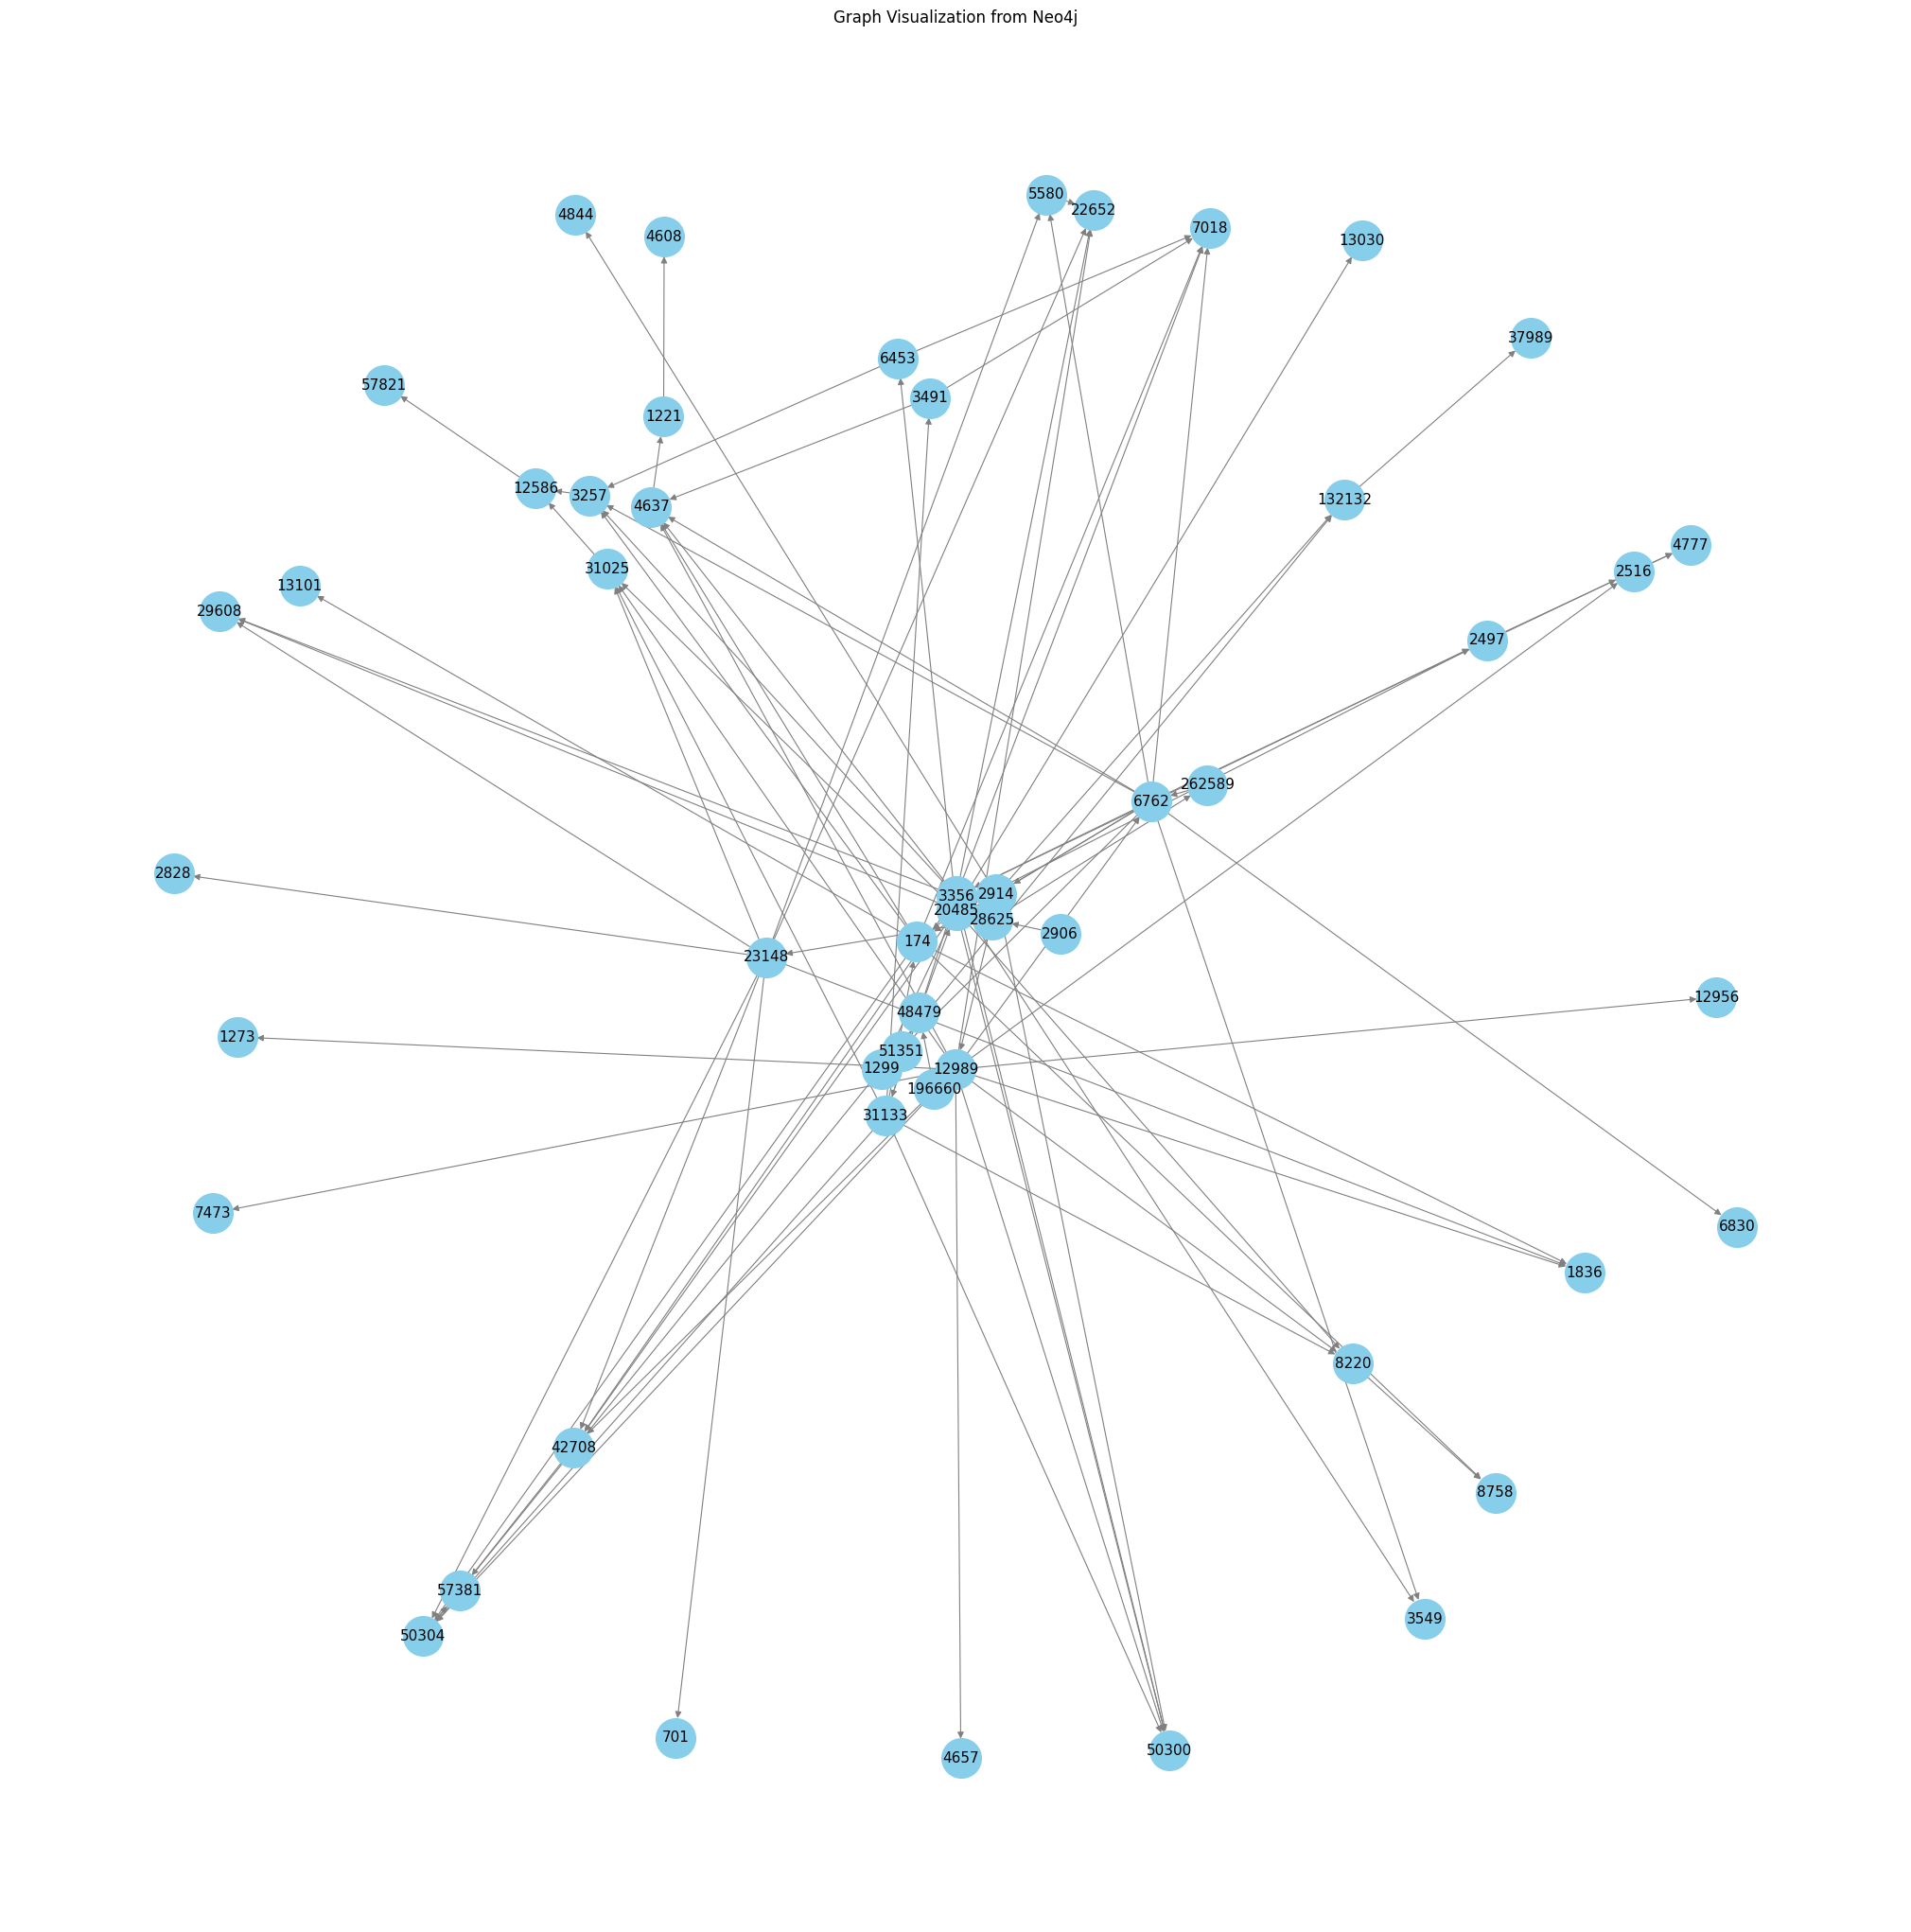

In [ ]:
# Draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(20, 20))
nx.draw(G, pos, with_labels=True, node_size=900, node_color="skyblue", font_size=11, width=0.8, edge_color="gray")
plt.title("Graph Visualization from Neo4j")
plt.show()

# Retrieve Graph from Neo4j

The graph is retrieved from Neo4j and loaded into a networkx Graph object

## Graph 1

In [ ]:
# Connect to Neo4j
graph = Graph(uri=uri, auth=(username, password))

# Fetch some data from Neo4j for visualization
query_t1 = """
MATCH (n1:Node_201511060000)-[r1:CONNECTS_201511060000]->(m1:Node_201511060000)
RETURN n1, r1, m1;
"""

data_t1 = graph.run(query_t1)

# Create a directed graph using networkx
G_t1 = nx.DiGraph()

for record in data_t1:
    # Add nodes
    G_t1.add_node(record["n1"]["id"]) # Assuming nodes have a 'name' property
    G_t1.add_node(record["m1"]["id"])

    # Add edge
    G_t1.add_edge(record["n1"]["id"], record["m1"]["id"], type=type(record["r1"]).__name__)

## Graph 2

In [ ]:
# Fetch some data from Neo4j for visualization
query_t2 = """
MATCH (n2:Node_201511060800)-[r2:CONNECTS_201511060800]->(m2:Node_201511060800)
RETURN n2, r2, m2;
"""

data_t2 = graph.run(query_t2)

# Create a directed graph using networkx
G_t2 = nx.DiGraph()

for record in data_t2:
    # Add nodes
    G_t2.add_node(record["n2"]["id"]) # Assuming nodes have a 'name' property
    G_t2.add_node(record["m2"]["id"])

    # Add edge
    G_t2.add_edge(record["n2"]["id"], record["m2"]["id"], type=type(record["r2"]).__name__)

# Basic operations

## Number of nodes

In [ ]:
# Retrieve all nodes
all_nodes = G.nodes()

# Print all nodes
print("Num of nodes in the graph:")
print(len(all_nodes))

Num of nodes in the graph:
51


## Number of edges

In [ ]:
# Calculate the number of edges
num_edges = G.size()

print(f"The graph has {num_edges} edges (or arcs).")

The graph has 100 edges (or arcs).


# Degree centrality

### Indegree for all nodes

#### Graph t1

In [ ]:
# Calculate in-degrees for all nodes
in_degrees_t1 = sorted(G_t1.in_degree())

# Print in-degrees for all nodes
for node, degree in sorted(in_degrees_t1):
    print(f"Node {node} has {degree} incoming links.")

Node 11179 has 0 incoming links.
Node 11303 has 0 incoming links.
Node 12008 has 0 incoming links.
Node 1221 has 1 incoming links.
Node 1251 has 0 incoming links.
Node 12586 has 3 incoming links.
Node 1273 has 1 incoming links.
Node 12956 has 1 incoming links.
Node 12989 has 1 incoming links.
Node 1299 has 2 incoming links.
Node 13030 has 1 incoming links.
Node 13101 has 1 incoming links.
Node 132132 has 5 incoming links.
Node 134394 has 0 incoming links.
Node 16657 has 1 incoming links.
Node 16921 has 0 incoming links.
Node 174 has 4 incoming links.
Node 1836 has 4 incoming links.
Node 196660 has 0 incoming links.
Node 197888 has 0 incoming links.
Node 200802 has 0 incoming links.
Node 204016 has 0 incoming links.
Node 20485 has 1 incoming links.
Node 22652 has 4 incoming links.
Node 22804 has 0 incoming links.
Node 23148 has 1 incoming links.
Node 2497 has 2 incoming links.
Node 2516 has 2 incoming links.
Node 262397 has 0 incoming links.
Node 262415 has 0 incoming links.
Node 262589

#### Graph t2

In [ ]:
# Calculate in-degrees for all nodes
in_degrees_t2 = sorted(G_t2.in_degree())

# Print in-degrees for all nodes
for node, degree in sorted(in_degrees_t2):
    print(f"Node {node} has {degree} incoming links.")

Node 11179 has 0 incoming links.
Node 11303 has 0 incoming links.
Node 12008 has 0 incoming links.
Node 1221 has 1 incoming links.
Node 1251 has 0 incoming links.
Node 12586 has 3 incoming links.
Node 1273 has 1 incoming links.
Node 12956 has 1 incoming links.
Node 12989 has 1 incoming links.
Node 1299 has 2 incoming links.
Node 13030 has 1 incoming links.
Node 13101 has 1 incoming links.
Node 132132 has 5 incoming links.
Node 134394 has 0 incoming links.
Node 16921 has 0 incoming links.
Node 174 has 4 incoming links.
Node 1836 has 4 incoming links.
Node 196660 has 0 incoming links.
Node 197888 has 0 incoming links.
Node 200802 has 0 incoming links.
Node 204016 has 0 incoming links.
Node 20485 has 1 incoming links.
Node 22652 has 5 incoming links.
Node 22804 has 0 incoming links.
Node 23148 has 1 incoming links.
Node 2497 has 2 incoming links.
Node 2516 has 2 incoming links.
Node 262397 has 0 incoming links.
Node 262415 has 0 incoming links.
Node 262589 has 1 incoming links.
Node 26273

### out-degree for all nodes

#### Graph t1

In [ ]:
# Calculate out-degrees for all nodes
out_degrees_t1 = sorted(G_t1.out_degree())

# Print out-degrees for all nodes
for node, degree in out_degrees_t1:
    print(f"Node {node} has {degree} outgoing links.")

Node 10026 has 4 outgoing links.
Node 1103 has 1 outgoing links.
Node 1136 has 1 outgoing links.
Node 1221 has 2 outgoing links.
Node 12586 has 1 outgoing links.
Node 1273 has 1 outgoing links.
Node 1299 has 2 outgoing links.
Node 174 has 1 outgoing links.
Node 18144 has 1 outgoing links.
Node 1836 has 0 outgoing links.
Node 209 has 1 outgoing links.
Node 22652 has 0 outgoing links.
Node 23969 has 2 outgoing links.
Node 2497 has 1 outgoing links.
Node 2516 has 5 outgoing links.
Node 2519 has 2 outgoing links.
Node 2914 has 4 outgoing links.
Node 29608 has 0 outgoing links.
Node 31025 has 1 outgoing links.
Node 3257 has 4 outgoing links.
Node 3333 has 0 outgoing links.
Node 3356 has 7 outgoing links.
Node 3549 has 0 outgoing links.
Node 37989 has 0 outgoing links.
Node 38040 has 10 outgoing links.
Node 38803 has 2 outgoing links.
Node 42708 has 2 outgoing links.
Node 45896 has 0 outgoing links.
Node 4608 has 0 outgoing links.
Node 4637 has 2 outgoing links.
Node 4651 has 11 outgoing lin

#### Graph t2

In [ ]:
# Calculate out-degrees for all nodes
out_degrees_t2 = sorted(G_t2.out_degree())

# Print out-degrees for all nodes
for node, degree in out_degrees_t2:
    print(f"Node {node} has {degree} outgoing links.")

Node 11179 has 1 outgoing links.
Node 11303 has 1 outgoing links.
Node 12008 has 1 outgoing links.
Node 1221 has 1 outgoing links.
Node 1251 has 1 outgoing links.
Node 12586 has 1 outgoing links.
Node 1273 has 1 outgoing links.
Node 12956 has 1 outgoing links.
Node 12989 has 14 outgoing links.
Node 1299 has 2 outgoing links.
Node 13030 has 1 outgoing links.
Node 13101 has 1 outgoing links.
Node 132132 has 1 outgoing links.
Node 134394 has 1 outgoing links.
Node 16921 has 1 outgoing links.
Node 174 has 11 outgoing links.
Node 1836 has 0 outgoing links.
Node 196660 has 1 outgoing links.
Node 197888 has 1 outgoing links.
Node 200802 has 1 outgoing links.
Node 204016 has 1 outgoing links.
Node 20485 has 12 outgoing links.
Node 22652 has 0 outgoing links.
Node 22804 has 1 outgoing links.
Node 23148 has 9 outgoing links.
Node 2497 has 1 outgoing links.
Node 2516 has 1 outgoing links.
Node 262397 has 1 outgoing links.
Node 262415 has 1 outgoing links.
Node 262589 has 1 outgoing links.
Node 26

In [ ]:
result = out_degrees["10026"]

print(f"Number of outgoing relationships from node with id=10026: {result}")

Number of outgoing relationships from node with id=10026: 4


# Isolated nodes

In [ ]:
# Find isolated nodes
isolated_nodes = list(nx.isolates(G_t1))

# Check and print results
if isolated_nodes:
    print("Isolated nodes in the graph:")
    for node in isolated_nodes:
        print(node)
else:
    print("No isolated nodes found.")

No isolated nodes found.


# Creating two graphs

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from py2neo import Graph

# Connect to Neo4j
graph = Graph(uri="neo4j+s://28e5b287.databases.neo4j.io", auth=("neo4j", "z9J3DPCCxGYELn99XDdFbFIBnWOwR5fdn4MiG_Nvdck"))

# Fetch some data from Neo4j for visualization
query = """
match (n:Node_201511060000)-[r]->(m)
return n,r,m
"""

data = graph.run(query)

# Create a directed graph using networkx
G_1 = nx.DiGraph()

for record in data:
    # Add nodes
    G_1.add_node(record["n"]["id"]) # Assuming nodes have a 'name' property
    G_1.add_node(record["m"]["id"])

    # Add edge
    G_1.add_edge(record["n"]["id"], record["m"]["id"], type=type(record["r"]).__name__)


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from py2neo import Graph

# Connect to Neo4j
graph = Graph(uri="neo4j+s://28e5b287.databases.neo4j.io", auth=("neo4j", "z9J3DPCCxGYELn99XDdFbFIBnWOwR5fdn4MiG_Nvdck"))

# Fetch some data from Neo4j for visualization
query = """
match (n:Node_201511060800)-[r]->(m)
return n,r,m
"""

data = graph.run(query)

# Create a directed graph using networkx
G_2 = nx.DiGraph()

for record in data:
    # Add nodes
    G_2.add_node(record["n"]["id"]) # Assuming nodes have a 'name' property
    G_2.add_node(record["m"]["id"])

    # Add edge
    G_2.add_edge(record["n"]["id"], record["m"]["id"], type=type(record["r"]).__name__)


In [ ]:
R = nx.intersection(G_1,G_2)

In [ ]:
check_list = []

for node in R.nodes():
  for node_2 in R.nodes():

    if(nx.has_path(G_1,node,node_2) & nx.has_path(G_2,node,node_2)):
      p1 = nx.shortest_path(G_1,node,node_2)
      p2 = nx.shortest_path(G_2,node,node_2)

      p1_l = nx.shortest_path_length(G_1,node,node_2)
      p2_l = nx.shortest_path_length(G_2,node,node_2)

      if((p1!=p2) & (p1_l!=p2_l)):
        check_list.append((node,node_2))

In [ ]:
check_list

[('31133', '4777'),
 ('31133', '2497'),
 ('22804', '4608'),
 ('22804', '57821'),
 ('22804', '37989'),
 ('22804', '4844'),
 ('22804', '7018'),
 ('22804', '13101'),
 ('22804', '4637'),
 ('22804', '2914'),
 ('22804', '3257'),
 ('22804', '132132'),
 ('22804', '1221'),
 ('22804', '12586'),
 ('22804', '50304'),
 ('22804', '174'),
 ('22804', '1836'),
 ('22804', '50300'),
 ('22804', '8758'),
 ('22804', '22652'),
 ('22804', '57381')]

In [ ]:
p1 = nx.shortest_path(G_1,'31133','4777')
p1

['31133', '3356', '2497', '4777']

In [ ]:
p1 = nx.shortest_path(G_2,'31133','4777')
p1

['31133', '174', '2914', '2497', '4777']

In [ ]:
print(nx.has_path(G_1,'4608','2497'))

True


1

# Change in no of paths

In [ ]:
all_paths = len(list(nx.all_simple_paths(G_1,'31133','4777')))
all_paths

1

In [ ]:
check_list = []

for node in R.nodes():
  for node_2 in R.nodes():

    if(nx.has_path(G_1,node,node_2) & nx.has_path(G_2,node,node_2)):

      p1_l = len(list(nx.all_simple_paths(G_1,node,node_2)))
      p2_l = len(list(nx.all_simple_paths(G_2,node,node_2)))

      if((p1_l!=p2_l)):
        check_list.append((node,node_2))

In [ ]:
check_list[:10]

[('28625', '4608'),
 ('28625', '4777'),
 ('28625', '57821'),
 ('28625', '37989'),
 ('28625', '2497'),
 ('28625', '4844'),
 ('28625', '3356'),
 ('28625', '7018'),
 ('28625', '4637'),
 ('28625', '2914')]

In [ ]:
print(len(list(nx.all_simple_paths(G_1,'28625','50300'))))
print(len(list(nx.all_simple_paths(G_2,'28625','50300'))))

9
7


In [ ]:
print(len(list(nx.all_simple_paths(G_1,'2906', '29608'))))
print(len(list(nx.all_simple_paths(G_2,'2906', '29608'))))

4
6


In [ ]:
print(len(list(nx.all_simple_paths(G_1,'1251', '4844'))))
print(len(list(nx.all_simple_paths(G_2,'1251', '4844'))))

6
5


# Diff in path and current path

In [ ]:
node_1 = '1251'
node_2 = '4844'

print(list(nx.all_simple_paths(G_1,node_1,node_2)))
print('Shortest Path',nx.shortest_path(G_1,node_1,node_2))

[['1251', '28625', '12989', '6762', '3356', '2914', '4844'], ['1251', '28625', '12989', '6762', '2914', '4844'], ['1251', '28625', '12989', '7473', '4844'], ['1251', '28625', '12989', '12956', '3356', '2914', '4844'], ['1251', '28625', '262589', '6762', '3356', '2914', '4844'], ['1251', '28625', '262589', '6762', '2914', '4844']]
Shortest Path ['1251', '28625', '12989', '7473', '4844']


In [ ]:
node_1 = '28625'
node_2 = '50300'

print(list(nx.all_simple_paths(G_1,node_1,node_2)))
print('Shortest Path',nx.shortest_path(G_1,node_1,node_2))

[['28625', '12989', '50300'], ['28625', '12989', '6762', '3356', '50300'], ['28625', '12989', '6762', '3356', '2914', '50300'], ['28625', '12989', '6762', '2914', '50300'], ['28625', '12989', '12956', '3356', '50300'], ['28625', '12989', '12956', '3356', '2914', '50300'], ['28625', '262589', '6762', '3356', '50300'], ['28625', '262589', '6762', '3356', '2914', '50300'], ['28625', '262589', '6762', '2914', '50300']]
Shortest Path ['28625', '12989', '50300']


# Path length

### T1

In [ ]:

# Define the start and end nodes
start_node = "22804"
end_node = "28625"

# Find all paths and their lengths
all_paths = list(nx.all_simple_paths(G_t1, source=start_node, target=end_node))
path_lengths = [(path, len(path)-1) for path in all_paths] # Length of path is number of edges

# Close the Neo4j connection
driver.close()

# Output the paths and their lengths
for path, length in path_lengths:
    print(f"Path: {path}, Length: {length}")

print(all_paths)

[]


In [ ]:

# Define the start and end nodes
start_node = "1251"
end_node = "4844"

# Find all paths and their lengths
all_paths = list(nx.all_simple_paths(G_t1, source=start_node, target=end_node))
path_lengths = [(path, len(path)-1) for path in all_paths] # Length of path is number of edges

# Close the Neo4j connection
driver.close()

# Output the paths and their lengths
for path, length in path_lengths:
    print(f"Path: {path}, Length: {length}")

print(all_paths)

Path: ['1251', '28625', '12989', '6762', '3356', '2914', '4844'], Length: 6
Path: ['1251', '28625', '12989', '6762', '2914', '4844'], Length: 5
Path: ['1251', '28625', '12989', '7473', '4844'], Length: 4
Path: ['1251', '28625', '12989', '12956', '3356', '2914', '4844'], Length: 6
Path: ['1251', '28625', '262589', '6762', '3356', '2914', '4844'], Length: 6
Path: ['1251', '28625', '262589', '6762', '2914', '4844'], Length: 5
[['1251', '28625', '12989', '6762', '3356', '2914', '4844'], ['1251', '28625', '12989', '6762', '2914', '4844'], ['1251', '28625', '12989', '7473', '4844'], ['1251', '28625', '12989', '12956', '3356', '2914', '4844'], ['1251', '28625', '262589', '6762', '3356', '2914', '4844'], ['1251', '28625', '262589', '6762', '2914', '4844']]


In [ ]:

# Define the start and end nodes
start_node = "48479"
end_node = "28625"

# Find all paths and their lengths
all_paths = list(nx.all_simple_paths(G_t1, source=start_node, target=end_node))
path_lengths = [(path, len(path)-1) for path in all_paths] # Length of path is number of edges

# Close the Neo4j connection
driver.close()

# Output the paths and their lengths
for path, length in path_lengths:
    print(f"Path: {path}, Length: {length}")

print(all_paths)

[]


In [ ]:

# Define the start and end nodes
start_node = "22804"
end_node = "448479"

# Find all paths and their lengths
all_paths = list(nx.all_simple_paths(G_t1, source=start_node, target=end_node))
path_lengths = [(path, len(path)-1) for path in all_paths] # Length of path is number of edges

# Close the Neo4j connection
driver.close()

# Output the paths and their lengths
for path, length in path_lengths:
    print(f"Path: {path}, Length: {length}")

print(all_paths)

[]


### T2

In [ ]:

# Define the start and end nodes
start_node = "22804"
end_node = "28625"

# Find all paths and their lengths
all_paths = list(nx.all_simple_paths(G_t2, source=start_node, target=end_node))
path_lengths = [(path, len(path)-1) for path in all_paths] # Length of path is number of edges

# Close the Neo4j connection
driver.close()

# Output the paths and their lengths
for path, length in path_lengths:
    print(f"Path: {path}, Length: {length}")

print(all_paths)

[]


In [ ]:

# Define the start and end nodes
start_node = "48479"
end_node = "28625"

# Find all paths and their lengths
all_paths = list(nx.all_simple_paths(G_t2, source=start_node, target=end_node))
path_lengths = [(path, len(path)-1) for path in all_paths] # Length of path is number of edges

# Close the Neo4j connection
driver.close()

# Output the paths and their lengths
for path, length in path_lengths:
    print(f"Path: {path}, Length: {length}")

print(all_paths)

[]


In [ ]:

# Define the start and end nodes
start_node = "22804"
end_node = "448479"

# Find all paths and their lengths
all_paths = list(nx.all_simple_paths(G_t2, source=start_node, target=end_node))
path_lengths = [(path, len(path)-1) for path in all_paths] # Length of path is number of edges

# Close the Neo4j connection
driver.close()

# Output the paths and their lengths
for path, length in path_lengths:
    print(f"Path: {path}, Length: {length}")

print(all_paths)

[]


In [ ]:

# Define the start and end nodes
start_node = "1251"
end_node = "4844"

# Find all paths and their lengths
all_paths = list(nx.all_simple_paths(G_t2, source=start_node, target=end_node))
path_lengths = [(path, len(path)-1) for path in all_paths] # Length of path is number of edges

# Close the Neo4j connection
driver.close()

# Output the paths and their lengths
for path, length in path_lengths:
    print(f"Path: {path}, Length: {length}")

print(all_paths)

Path: ['1251', '28625', '12989', '6762', '2914', '4844'], Length: 5
Path: ['1251', '28625', '12989', '6762', '174', '2914', '4844'], Length: 6
Path: ['1251', '28625', '12989', '7473', '4844'], Length: 4
Path: ['1251', '28625', '262589', '6762', '2914', '4844'], Length: 5
Path: ['1251', '28625', '262589', '6762', '174', '2914', '4844'], Length: 6
[['1251', '28625', '12989', '6762', '2914', '4844'], ['1251', '28625', '12989', '6762', '174', '2914', '4844'], ['1251', '28625', '12989', '7473', '4844'], ['1251', '28625', '262589', '6762', '2914', '4844'], ['1251', '28625', '262589', '6762', '174', '2914', '4844']]
